##**10-Times Series**

## **1.Instalaciones y Importaciones**

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.5 MB/s eta 0:00:00


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

## **2.Subimos y Abrimos Database**

In [3]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
df = pd.read_csv(url)
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


## **3.Descripción de Variables:**

In [4]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: date
                            Conteo  Porcentaje (%)
date                                              
2023-09-03 17:10:08.079328       1            0.27
2022-09-03 17:10:08.079328       1            0.27
2022-09-04 17:10:08.079328       1            0.27
2022-09-05 17:10:08.079328       1            0.27
2022-09-06 17:10:08.079328       1            0.27
...                            ...             ...
2022-09-21 17:10:08.079328       1            0.27
2022-09-20 17:10:08.079328       1            0.27
2022-09-19 17:10:08.079328       1            0.27
2022-09-18 17:10:08.079328       1            0.27
2022-09-17 17:10:08.079328       1            0.27

[366 rows x 2 columns]

Columna: sales
             Conteo  Porcentaje (%)
sales                              
1000.482785       1            0.27
55.292157         1            0.27
53.803211         1            0.27
58.141693         1            0.27
64.530899         1            0.27
...             ...           

## **4. Cribado Manual**

## 4.1 No tenemos que reemplazar Valores Atipicos por NAN

## 4.2 Identificar columnas con columnas constantes

## 4.3. Eliminamos filas y columnas duplicadas.

## 4.4 Eliminar Columnas redundantes. No eliminamos ninguna.

## **5. Eliminar columnas Data leakage**

## **6. Analizar Valores sin sentido** No tenemos valores sin sentido

## **7. Valores faltantes por columna**

## **8. Valores faltantes por filas.**

##  **9. Convertir variables date a date.**

In [5]:
df['date'] = pd.to_datetime(df['date'])

df.info()
df = df.set_index('date')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


In [6]:
df.index.inferred_freq

'D'

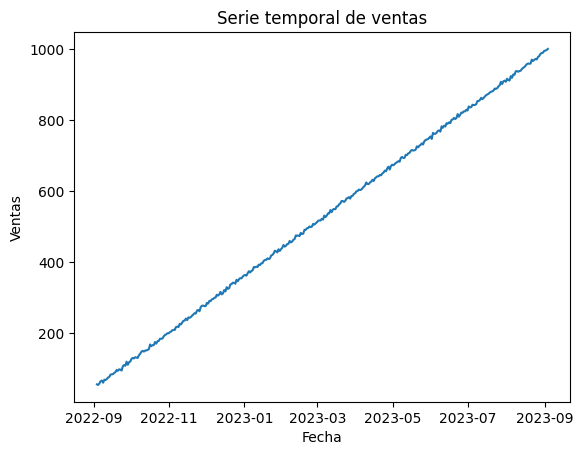

In [7]:

plt.figure()
plt.plot(df['sales'])
plt.title("Serie temporal de ventas")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

##**10. ¿Cuál es el tensor de la serie temporal?** El tensor de la serie temporal es diario, ya que se registra un valor de ventas por cada día

## **11.¿Cuál es la tendencia?** La serie muestra una tendencia creciente, ya que las ventas aumentan progresivamente con el paso del tiempo.

## **12. ¿Es estacionaria?** Si p-value > 0.05:

La serie no es estacionaria, lo que justifica el uso de diferenciación en el modelo ARIMA.

In [8]:
adf = adfuller(df['sales'])
print("p-value:", adf[1])

p-value: 0.9861899815311063


## **13. ¿Existe variabilidad o presencia de ruido?**

In [9]:
df['sales'].describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


La serie presenta variabilidad moderada, con fluctuaciones entre días consecutivos, aunque sin ruido extremo.

## **14. Hacer Train-Split**

In [10]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

## **15. Entrena un ARIMA**

In [11]:
auto_model = auto_arima(
    train['sales'],
    seasonal=False,
    trace=True,
    suppress_warnings=True
)

auto_model.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1675.428, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1578.564, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1475.165, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1763.761, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1475.512, Time=2.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1475.495, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1479.028, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1762.924, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 9.862 seconds


(0, 1, 1)

In [12]:
model = ARIMA(train['sales'], order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -879.462
Date:                Sun, 04 Jan 2026   AIC                           1762.924
Time:                        13:47:45   BIC                           1770.271
Sample:                    09-03-2022   HQIC                          1765.867
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0758      0.077     -0.981      0.326      -0.227       0.076
sigma2        24.6927      2.048     12.056      0.000      20.679      28.707
Ljung-Box (L1) (Q):                  73.69   Jarque-

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## **16. Predicccion**

In [13]:
forecast = model_fit.forecast(steps=len(test))

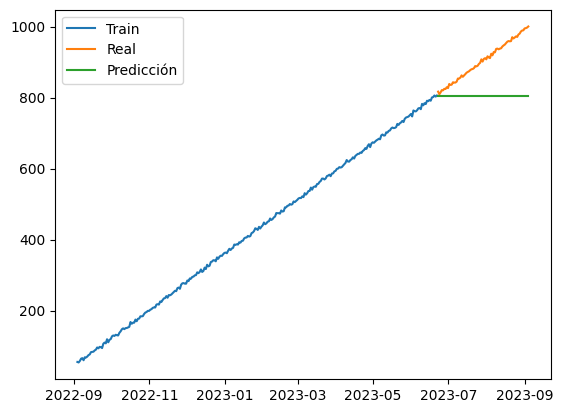

In [14]:
plt.figure()
plt.plot(train.index, train['sales'], label="Train")
plt.plot(test.index, test['sales'], label="Real")
plt.plot(test.index, forecast, label="Predicción")
plt.legend()
plt.show()

## **17. Métricas de Rendimiento**

In [15]:

mae = mean_absolute_error(test['sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 98.86462982803404
RMSE: 113.37754061886254
